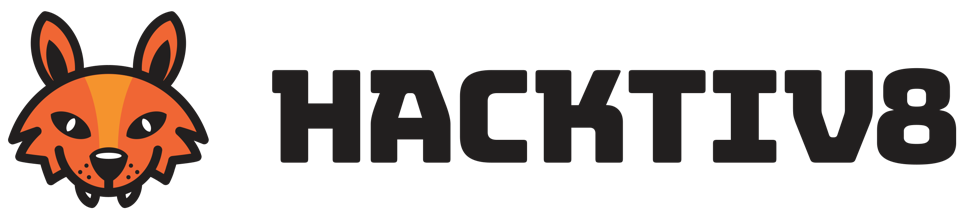

---
# Assignment 2

#### Fadhilah Gustriandini 
---

---
## About Dataset

This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period. This dataset contains the location, address, type, sale price, and sale date of building units sold

---

---
## Import Library

Hal pertama yang akan dilakukan adalah import library yang akan dibutuhkan dalam proses preprocessing dan metode statistik sebagai berikut:

In [1]:
# Library For DataFrame
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import math
import seaborn as sns
import statistics
import scipy.stats
from scipy.stats import t
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

---

---
## Loading and Reading Dataset

### Import Dataset

Dilakukan load dataset menggunakan pandas

In [2]:
missing_values = ["-", "NaN", "nan"]

data = pd.read_csv(r"~/datasets/nyc-rolling-sales.csv", na_values=missing_values)

Akan dilihat 5 baris teratas dari dataset menggunakan fungsi head()

In [3]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Akan dilihat juga 5 baris terbawah dari dataset menggunakan fungsi tail()

In [4]:
data.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


### Type of Data

Gunakan metode info() untuk mendapatkan informasi dasar tentang kerangka data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

### List of Columns

untuk mendapatkan list header kolom dapat menggunakan parameter .columns dataframe

In [6]:
data.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

### Index

untuk mendapatkan daftar indeks akan digunakan parameter .index

In [7]:
data.index.values

array([    0,     1,     2, ..., 84545, 84546, 84547], dtype=int64)

### Number of Rows and Columns

Menggunakan parameter .shape untuk melihat dimensi dataframe

In [8]:
data.shape

(84548, 22)

Dataset ini memiliki baris berjumlah 84548 dan kolom yang berjumlah 22

###  Summary Statistics

Melihat statistika deskriptif dari data menggunakan fungsi describe()

In [9]:
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


### Delete Columns

In [10]:
# hapus kolom
kol = (["Unnamed: 0", "EASE-MENT", "APARTMENT NUMBER", "ADDRESS", "ZIP CODE", "SALE DATE", ])
data.drop(kol, axis=1, inplace=True)

# menampilkan 5 data teratas
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633,6440,1900,2,C2,6625000
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,28,3,31,4616,18690,1900,2,C7,-
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,16,1,17,2212,7803,1900,2,C7,-
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272,6794,1913,2,C4,3936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369,4615,1900,2,C2,8000000


### Change Data Type

In [11]:
# mengubah tipe untuk beberapa kolom menjadi category

Categoricals = ["NEIGHBORHOOD","BUILDING CLASS CATEGORY",
                "TAX CLASS AT PRESENT","BUILDING CLASS AT PRESENT",
                "TAX CLASS AT TIME OF SALE","BUILDING CLASS AT TIME OF SALE"]

for col in Categoricals:
    data[col]=data[col].astype("category")

In [12]:
# mengubah tipe untuk beberapa kolom menjadi numeric

Nmrc = ["BOROUGH","LAND SQUARE FEET",
        "GROSS SQUARE FEET","SALE PRICE" ]

for col in Nmrc:
    data[col]=pd.to_numeric(data[col], errors="coerce")

### Missing Values

Menggunakan .isnull().sum() untuk mengetahui jumlah missing value pada setiap kolom

In [13]:
data.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
dtype: int64

### Data Cleaning

In [14]:
# drop missing value
data = data.dropna()

In [15]:
# periksa kembali jika ada missing value
data.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
dtype: int64

In [16]:
data = data[(data["LAND SQUARE FEET"] != 0) & 
            (data["GROSS SQUARE FEET"] != 0) & 
            (data["YEAR BUILT"] > 1700) & 
            (data["SALE PRICE"] > 5000) &
            (data["TOTAL UNITS"] != 0)
            ]

### Duplicated Data

In [17]:
data.duplicated().sum()

142

In [18]:
# drop data duplikat
data.drop_duplicates(inplace=True)

# cek kembali duplikat data
print(sum(data.duplicated()))

0


In [19]:
# mengubah index 
data.reset_index(drop=True, inplace=True)
data.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0


In [20]:
data.shape

(28265, 16)

---
## Measure of Central Tendency

### Mean

##### Berapa rata - rata sale price dari setiap 7 kategori building class dengan sale price tertinggi?

In [21]:
# melihat data building class category dan sale price
data_class1 = data.loc[:,['BUILDING CLASS CATEGORY','SALE PRICE']]

data_class1

,BUILDING CLASS CATEGORY,SALE PRICE
0,07 RENTALS - WALKUP APARTMENTS,6625000.0
1,07 RENTALS - WALKUP APARTMENTS,3936272.0
2,07 RENTALS - WALKUP APARTMENTS,8000000.0
3,07 RENTALS - WALKUP APARTMENTS,3192840.0
4,08 RENTALS - ELEVATOR APARTMENTS,16232000.0
...,...,...
28260,02 TWO FAMILY DWELLINGS,450000.0
28261,02 TWO FAMILY DWELLINGS,550000.0
28262,02 TWO FAMILY DWELLINGS,460000.0
28263,22 STORE BUILDINGS,11693337.0


In [22]:
data_top7 = data_class1.groupby("BUILDING CLASS CATEGORY").mean().sort_values(by="SALE PRICE", ascending=False)
data_top7 = data_top7.head(7)
data_top7

,SALE PRICE
BUILDING CLASS CATEGORY,
25 LUXURY HOTELS,1.423775e+08
11A CONDO-RENTALS,5.667319e+07
31 COMMERCIAL VACANT LAND,4.182500e+07
21 OFFICE BUILDINGS,4.025797e+07
26 OTHER HOTELS,2.518492e+07
08 RENTALS - ELEVATOR APARTMENTS,2.498340e+07
34 THEATRES,2.393750e+07


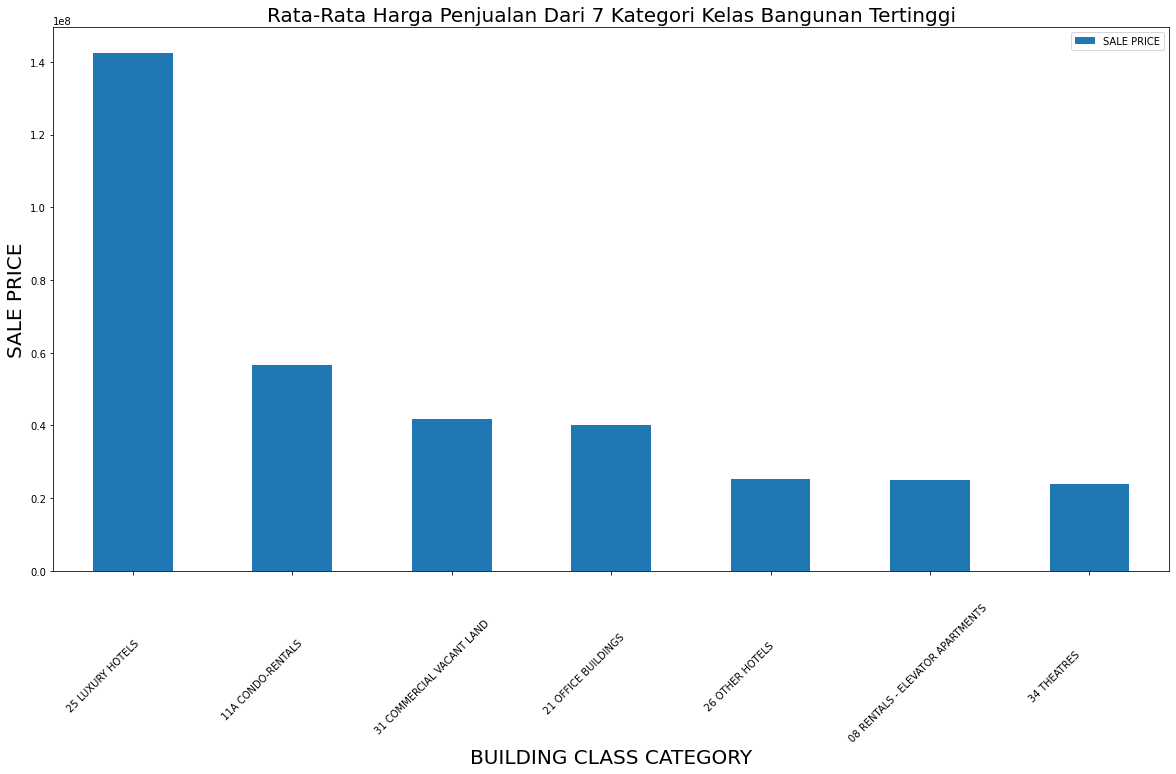

In [23]:
# inisiasi bar chart
data_top7.plot(kind = 'bar', 
                    figsize=(20,10), 
                    legend = True)

# membuat nama judul bar chart
plt.title("Rata-Rata Harga Penjualan Dari 7 Kategori Kelas Bangunan Tertinggi", fontsize = 20)
# membuat nama xlabel
plt.xlabel("BUILDING CLASS CATEGORY", fontsize = 20)
# membuat nama ylabel
plt.ylabel("SALE PRICE", fontsize = 20)

plt.xticks(rotation = 45)

# menampilkan bar chart
plt.show()

<b>Kesimpulan</b>

Dari hasil diatas dapat dilihat bahwa rata-rata sale price tertinggi berada pada building class category `25 Luxury Hotels`, dimana rata-rata tersebut bernilai $142377525

### Median

##### Bagaimana median sale price dari 3 neighborhood tertinggi

In [24]:
# Melihat data neighborhood dan sale price
data_nhood = data.loc[:,['NEIGHBORHOOD','SALE PRICE']]

data_nhood

,NEIGHBORHOOD,SALE PRICE
0,ALPHABET CITY,6625000.0
1,ALPHABET CITY,3936272.0
2,ALPHABET CITY,8000000.0
3,ALPHABET CITY,3192840.0
4,ALPHABET CITY,16232000.0
...,...,...
28260,WOODROW,450000.0
28261,WOODROW,550000.0
28262,WOODROW,460000.0
28263,WOODROW,11693337.0


In [25]:
data_med = data_nhood.groupby("NEIGHBORHOOD").median().sort_values(by="SALE PRICE", ascending=False)
data_med.head(3)

,SALE PRICE
NEIGHBORHOOD,
FINANCIAL,100107200.0
TRIBECA,90000000.0
MIDTOWN CBD,76375000.0


<b>Kesimpulan</b>

Dari hasil diatas dapat diambil kesimpulan bahwa median sale price tertinggi berdasarkan neighborhoodnya adalah `financial` dengan nilai median sebesar $100107200.
Dimana, 3 neighborhood dengan median sale price tertinggi adalah :

1. Financial = 100107200
2. Tribeca = 90000000
3. Midtown CBD = 76375000

### Modus

##### Tentukan building class category yang paling banyak di New York

In [26]:
#Dalam analisa data ini hanya akan digunakan kolom total unit dan SALE DATE
data_bcc = data.loc[:,['BUILDING CLASS CATEGORY']]

data_bcc

,BUILDING CLASS CATEGORY
0,07 RENTALS - WALKUP APARTMENTS
1,07 RENTALS - WALKUP APARTMENTS
2,07 RENTALS - WALKUP APARTMENTS
3,07 RENTALS - WALKUP APARTMENTS
4,08 RENTALS - ELEVATOR APARTMENTS
...,...
28260,02 TWO FAMILY DWELLINGS
28261,02 TWO FAMILY DWELLINGS
28262,02 TWO FAMILY DWELLINGS
28263,22 STORE BUILDINGS


In [27]:
data_bcc.nunique()

BUILDING CLASS CATEGORY    29
dtype: int64

In [28]:
data_bcc.mode()

,BUILDING CLASS CATEGORY
0,01 ONE FAMILY DWELLINGS


<b>Kesimpulan</b>

Dapat diambil kesimpulan bahwa dari 29 building class category yang ada, `01 ONE FAMILY DWELLINGS` merupakan building class category terbanyak di New York

---

---
## Measure of Spread

### Range

##### Tentukan range sale price dari 7 kategori building class dengan sale price tertinggi?

In [29]:
data_top7

,SALE PRICE
BUILDING CLASS CATEGORY,
25 LUXURY HOTELS,1.423775e+08
11A CONDO-RENTALS,5.667319e+07
31 COMMERCIAL VACANT LAND,4.182500e+07
21 OFFICE BUILDINGS,4.025797e+07
26 OTHER HOTELS,2.518492e+07
08 RENTALS - ELEVATOR APARTMENTS,2.498340e+07
34 THEATRES,2.393750e+07


In [30]:
data_range = np.ptp(data_top7['SALE PRICE'])
data_range

118440025.0

<b>Kesimpulan</b>

Dapat disimpulkan bahwa range sale price dari 7 kategori building class dengan sale price tertinggi adalah 118440025

### Variance

##### Tentukan variance sale price dari 7 kategori building class dengan sale price tertinggi?

In [31]:
data_var=statistics.variance(data_top7['SALE PRICE'])
data_var

1776137848324095.2

<b>Kesimpulan</b>

Kesimpulan yang dapat diambil adalah variasi sale price dari 7 kategori building class dengan sale price tertinggi bernilai 1776137848324095.2

### Standard Deviation

##### Tentukan standar deviasi sale price dari 7 kategori building class dengan sale price tertinggi?

In [32]:
data_sd=statistics.stdev(data_top7['SALE PRICE'])
data_sd

42144250.47766415

<b>Kesimpulan</b>

Dapat disimpulkan bahwa standar deviasi sale price dari 7 kategori building class dengan sale price tertinggi adalah 42144250.47766415

---

---
## Probability Distribution

##### Bagaimana distribusi peluang dari land square feet?

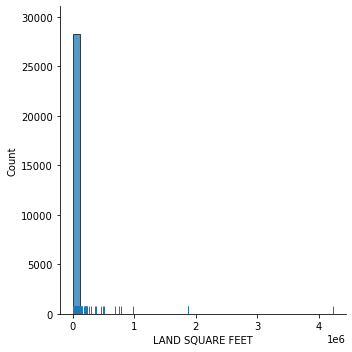

In [33]:
sns.displot(data['LAND SQUARE FEET'], bins=40, rug=True)

karena terdapat banyak data LAND SQUARE FEET yang memiliki nilai kecil, maka akan dilakukan penghapusan data tersebut.

In [34]:
data_lsf = data[(data['LAND SQUARE FEET'] > 10000) & (data['LAND SQUARE FEET'] < 10000000)]

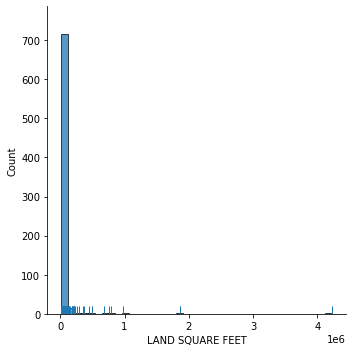

In [35]:
sns.displot(data_lsf['LAND SQUARE FEET'], bins=40, rug=True)

Belum terdapat perubahan pada plot setelah melakukan penghapusan. Oleh karena itu, akan dilakukan normalisasi data dengan menggunakan transformasi log.

In [36]:
data_lsf['LOG_LSF'] = np.log(data_lsf['LAND SQUARE FEET'])

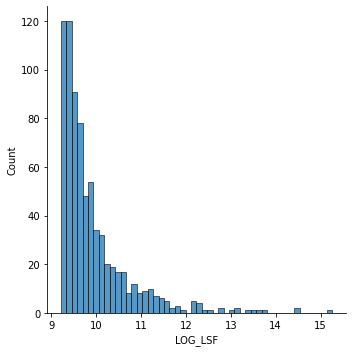

In [37]:
sns.displot(data_lsf['LOG_LSF'], bins=50)

<b>Kesimpulan</b>

Setelah dilakukan normalisasi data dengan menggunakan transformasi log, distribusi LAND SQUARE FEET menjadi lebih normal secara visual. Distribusi LAND SQUARE FEET memiliki kemiringan yang positif kekiri. Dengan melihat bentuk plotnya, distribusi LAND SQUARE FEET dapat memiliki distribusi dalam bentuk gamma atau eksponensial.

---

---
## Confidence Intervals

##### Bagaimana Confidence Intervals dari 7 sale price tertinggi?

In [38]:
#mendefinisikan kolom 7 sale price tertinggi sebagai x
x = data["SALE PRICE"].head(7) 

m = x.mean()
s = x.std()
dof = len(x)-1 #degree of freedom atau derajat bebas untuk menentukan nilai statistik uji

confidence = 0.95 #peluang 
t_crit = np.abs(t.ppf((1-confidence)/2,dof)) #nilai statistik uji t

values = np.round((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))), 2)

print(values)

[ 4342698.4  12867619.31]


<b>Kesimpulan</b>

Berdasarkan hasil di atas, dapat disimpulkan bahwa rata-rata sale price berada di antara 4342698.4 sampai 12867619.31 dengan peluang atau selang kepercayaan 0.95 atau 95%.

---

---
## Hypotesis Testing

##### Apakah land square feet berpengaruh pada sale price?

In [39]:
from scipy.stats import kendalltau

data1 = data['LAND SQUARE FEET']
data2 = data['SALE PRICE']

stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Probability Independent')
else :
    print('Probability Dependent')

stat=0.093, p=0.000
Probability Dependent


<b>Kesimpulan</b>

Dari hasil diatas, dapat disimpulkan bahwa land square feet berpengaruh pada sale price

---